# Customer Churn Prediction

In [1]:
# Importing libraries
import seaborn as sb
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
import pickle

In [2]:
# Reading data
data = pd.read_csv('Churn_Modelling.csv')

In [3]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Analysis
Checking for null values and removing unnecessary columns

In [4]:
#Checking if any data is null
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: >

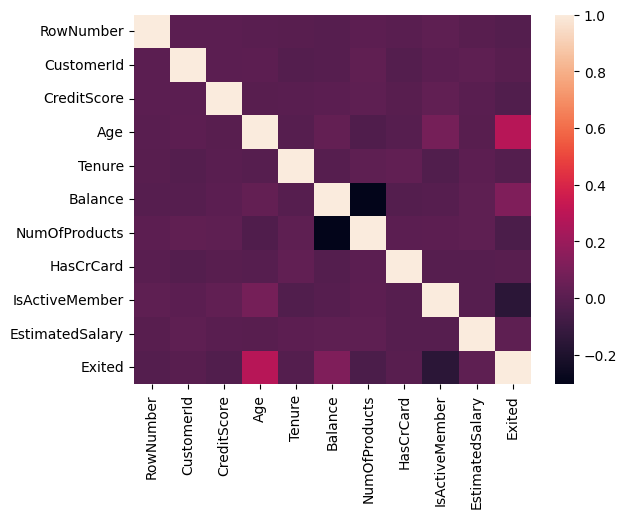

In [5]:
# Checking for Correlation between features
sb.heatmap(data[[i for i in data.columns\
                if data[i].dtypes in ['int32', 'int64', 'float32', 'float64']]]\
          .corr())

## Data Preprocessing

In [6]:
# Transforming categorical feature to numerical feature
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data['Geography'] = le.fit_transform(data['Geography'])

# Dropping unnecessary columns
data.drop(['RowNumber','CustomerId','Surname'], axis = 1, inplace=True)

## Balancing Target Class

<Axes: xlabel='Exited'>

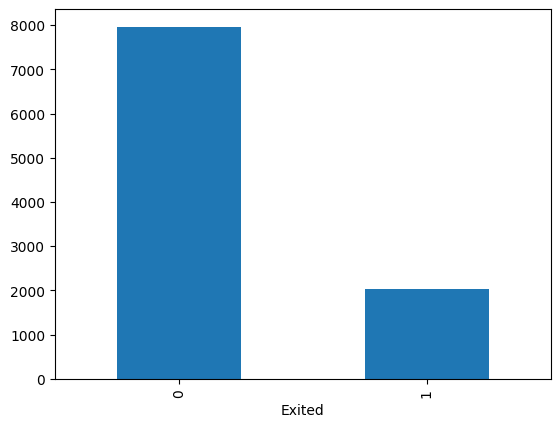

In [7]:
data['Exited'].value_counts().plot.bar()

In [8]:
# Splitting into independent and dependent features
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [9]:
X,y = SMOTE().fit_resample(X,y)

## Training Model

In [10]:
# Splitting into training and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [11]:
# Standardizing large numerical features
scaler = StandardScaler()
X_train[['Balance', 'EstimatedSalary','CreditScore']] = scaler.fit_transform(X_train[['Balance', 'EstimatedSalary','CreditScore']])
X_test[['Balance', 'EstimatedSalary','CreditScore']] = scaler.transform(X_test[['Balance', 'EstimatedSalary','CreditScore']])
X_train = pd.DataFrame(X_train)

In [12]:
rf = RandomForestClassifier()
classifier = GradientBoostingClassifier()

In [13]:
rf.fit(X_train, y_train)
classifier.fit(X_train, y_train)

GradientBoostingClassifier()

## Prediction

In [14]:
y_pred = rf.predict(X_test)
y_pred_grad = classifier.predict(X_test)

In [15]:
score = accuracy_score(y_test, y_pred)
score_grad = accuracy_score(y_test ,y_pred_grad)
print(score)
print(score_grad)

0.8525494672754946
0.8424657534246576


In [16]:
print(classification_report(y_test, y_pred_grad))

              precision    recall  f1-score   support

           0       0.84      0.85      0.84      2662
           1       0.84      0.84      0.84      2594

    accuracy                           0.84      5256
   macro avg       0.84      0.84      0.84      5256
weighted avg       0.84      0.84      0.84      5256



In [17]:
# Saving Gradient Booster model
with open("./grad_booster.pkl", "wb") as f:
    pickle.dump(classifier, f)

In [18]:
# Saving scaler model
with open("./scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)